# Avocado Project

Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold


In [116]:
# importing the required dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

In [69]:
# reading the csv file 

df=pd.read_csv('avocado.csv')

In [70]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [71]:
# dropping the unwanted column i.e unnamed

new_df=df.drop(['Unnamed: 0'],axis=1)
new_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [72]:
# checking other information
new_df.shape

(18249, 13)

In [73]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Here we have 13 columns and 16468 rows in the dataset

In [74]:
# checking the datatype for each column
new_df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [75]:
# checking for null values
new_df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [76]:
# printing the details of dataset 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Here there are 18249 rows and 13 columns on which we are going to perform operation

In [78]:
# finding the mathematical aspects in data set
new_df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [79]:
# checking the mean price for each year
new_df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [80]:
# finding how much type of avacado sell in last 4 years
new_df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

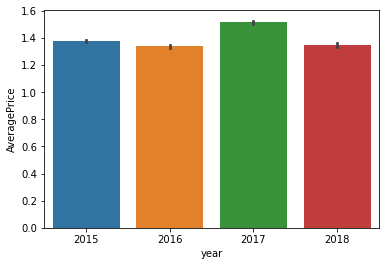

In [81]:
# checking the ratio of year and average price so that we can find the max average price for year
sns.barplot(x='year',y='AveragePrice',data=new_df)

From the above graph we can say that average price in year 2017 is maximum as compare to other years

In [87]:
# applying functions on the date for simplification purpose
new_df['Date']=pd.to_datetime(df['Date'])
new_df['Month']=new_df['Date'].apply(lambda x:x.month)
new_df['Day']=new_df['Date'].apply(lambda x:x.day)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

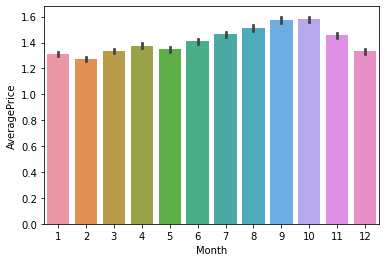

In [88]:
# checking the ratio of month and price for the year having maximum average price
sns.barplot(x="Month",y='AveragePrice',data=new_df)

Year 2017 is that year where the price is maximum as compared to other year, and there is less difference among rest of the year.

September and October are the month where max no of average price is there, but the thing is almost for whole year the price is almost same for the avocado this prove that there is so much craze of avocado rather than India.

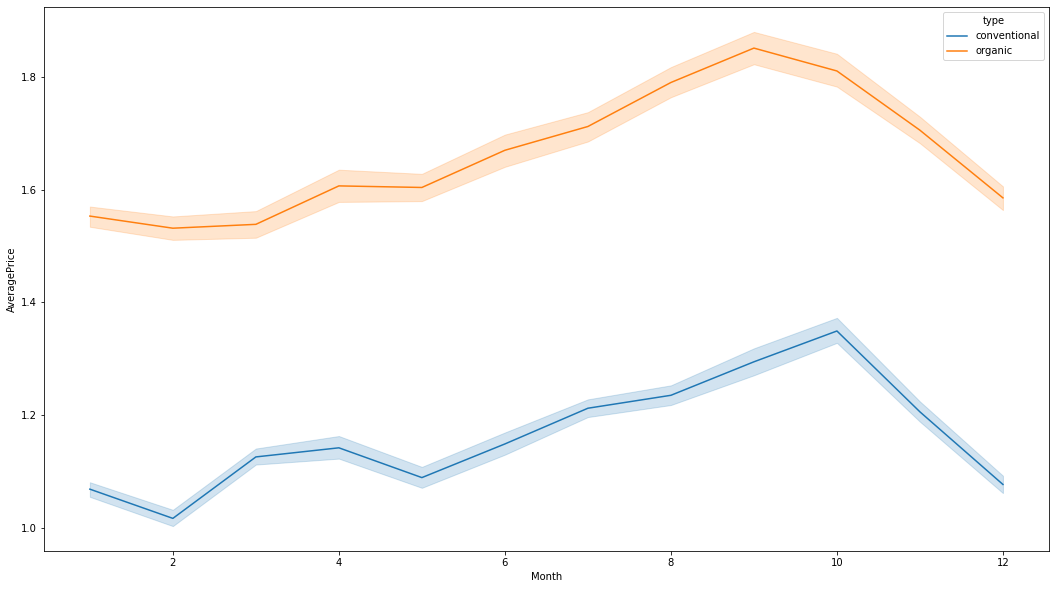

In [91]:
#Average price  distribution over the months for Conventional and Organic Types
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=new_df)
plt.show()

Looks like there was a hike between months 8 – 10 for both Conventional and Organic type of Avocados prices

Also, the conventional type of avocado is varying in term of price as seen in line plot because in starting the price is high but then it get decrease and so on.

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'Day'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

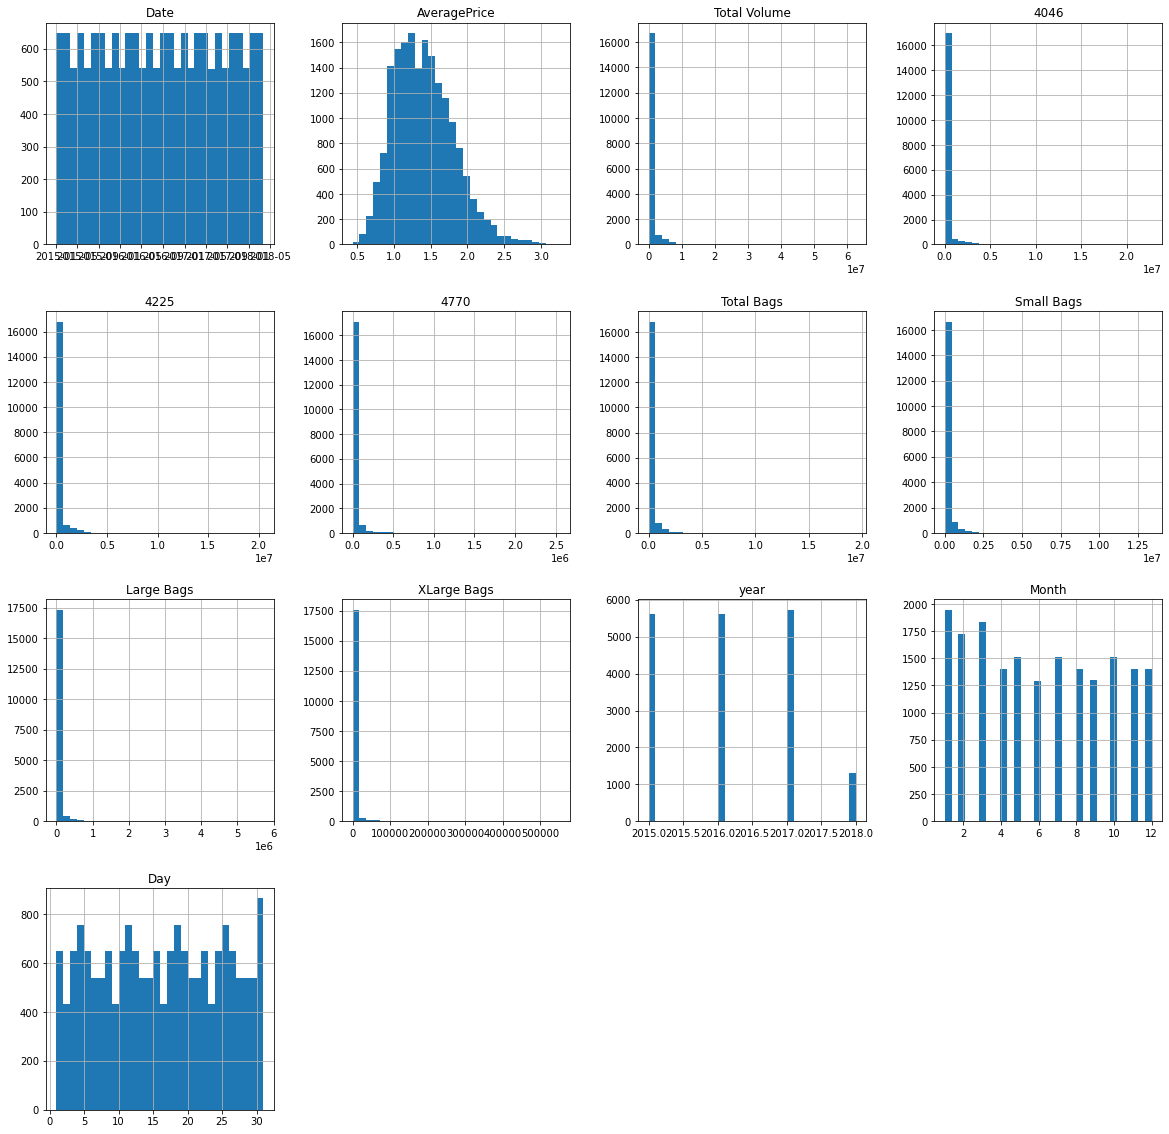

In [96]:
# plotting histogram for unvariate analysis
new_df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

From plotting this histogram, I used the bin size as 30, we can take any bin size (suited as per as data).

Average price column is normally distributing over the histogram.
Rest of the data are not much varying in term of numbers, so they are almost left skewed data
To make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.

Text(0.5, 1.0, 'Average Price')

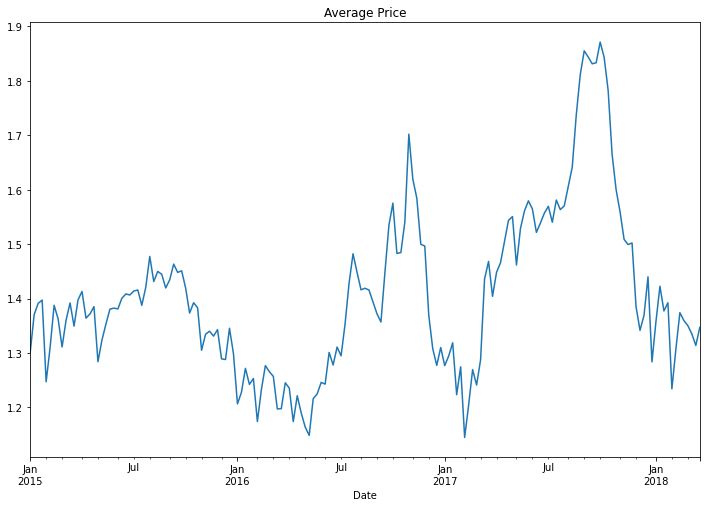

In [100]:
#price distribution over the date column
byDate=new_df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

This also shows there was a huge hike in prices after July 2017 and before Jan 2018. This was also confirmed in earlier graph too.

[]

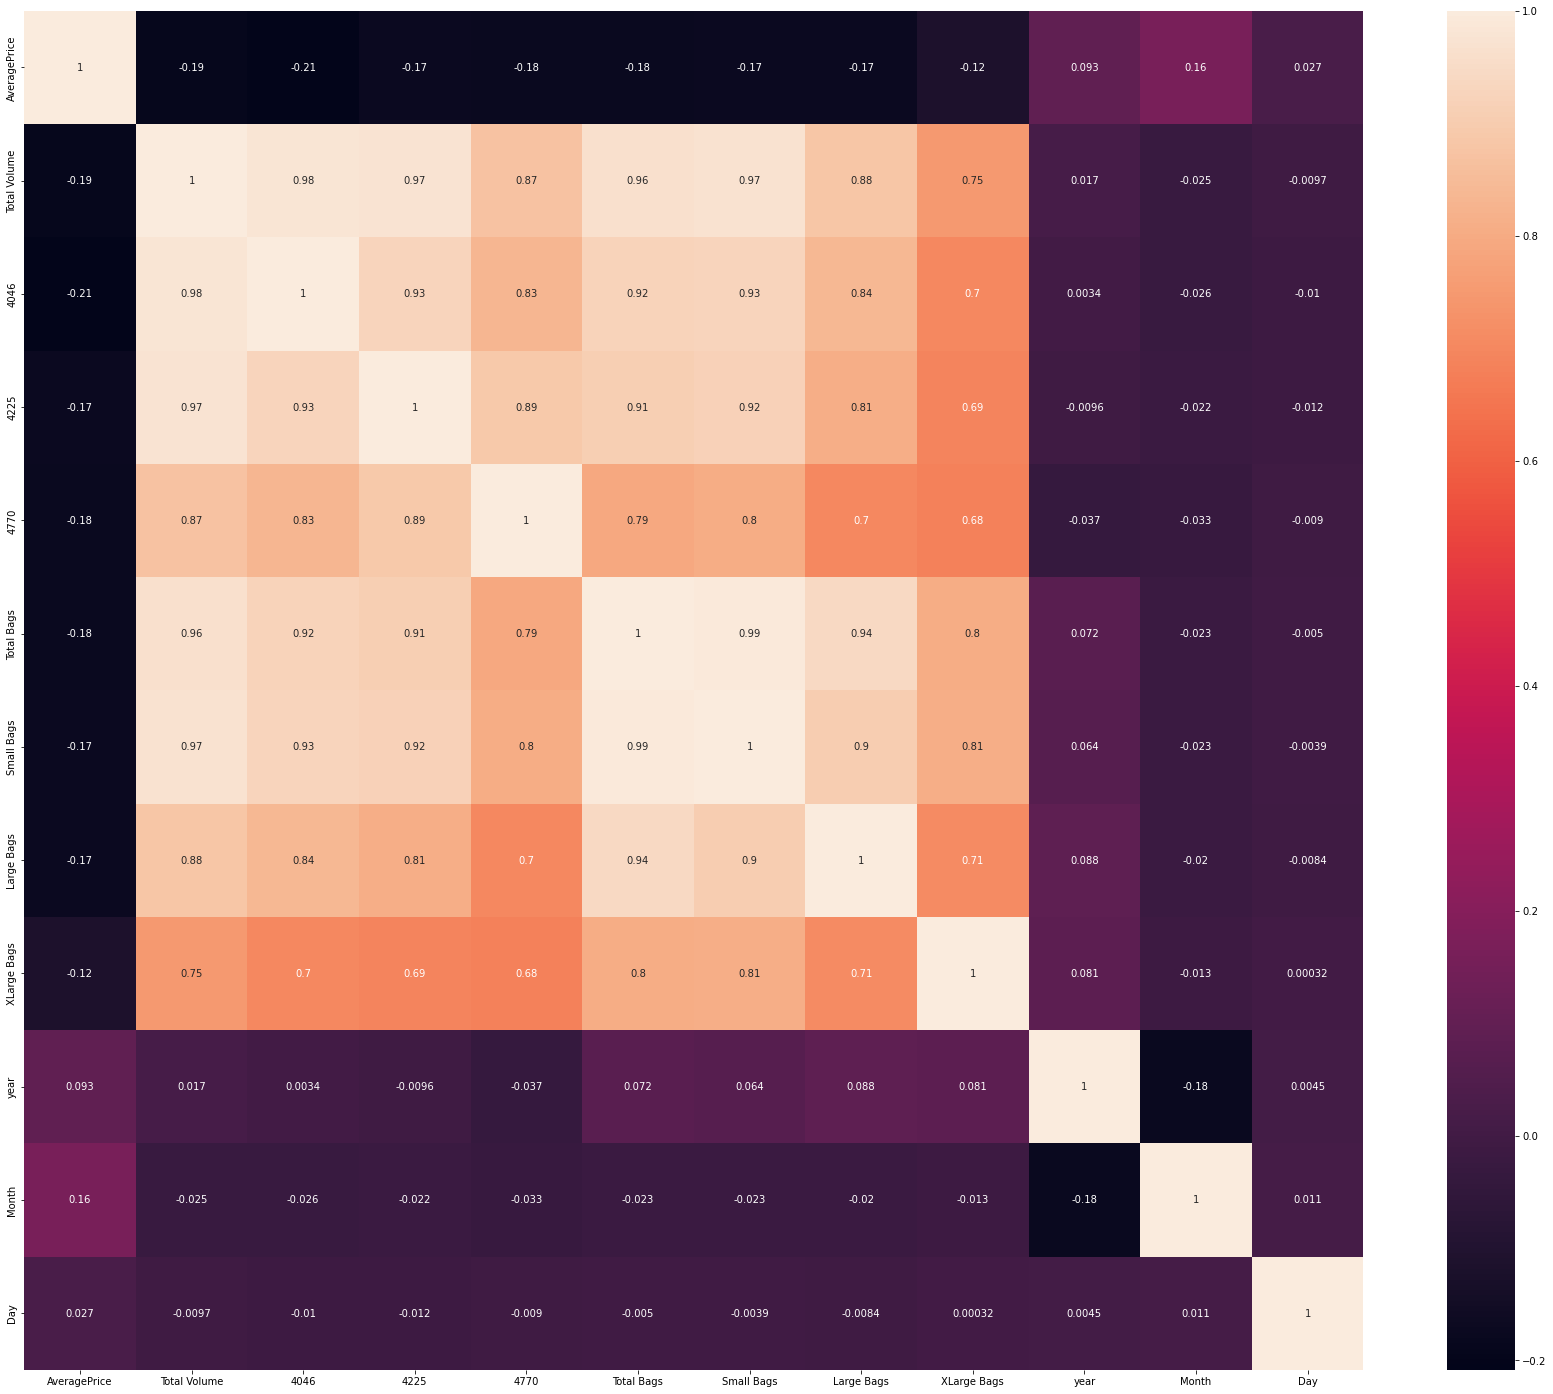

In [99]:
# finding the correlation of all columns to each other
corr_df=new_df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr_df,annot=True)
plt.plot()

As we can from the heatmap above, all the Features are not correleted with the Average Price column, instead most of them are correlated with each other.

----------------------------------------------------------------------Feature Engineering for Model building---------------------------------------------

In [101]:
# finding the unique regions
new_df['region'].nunique()

54

In [102]:
# unique type of avacodo
new_df['type'].nunique()

2

 Model selection/predictions
    
    
Now our data are ready! lets apply our model which is going to be the Linear Regression because our Target variable 'AveragePrice' is continuous.

As we can see we have 54 regions and 2 unique types, so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

In [108]:
# droppping the region and date column from the dataset
df_final=pd.get_dummies(new_df.drop(['region','Date'],axis=1),drop_first=True)

In [109]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [110]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Creating and Training the Model

In [111]:

lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.23297133291663433
MSE: 0.09108802805345187
RMSE: 0.30180793238987585


The RMSE is low so we can say that we do have a good model, but lets check to be more sure.

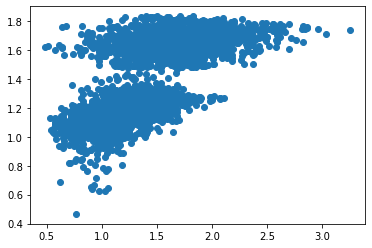

In [114]:
#plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)

As we can see that we don't have a straight line so I am not sure that this is the best model we can apply on our data

Decision Tree Regression

In [117]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13592602739726029
MSE: 0.044547315068493146
RMSE: 0.21106234877043595


RMSE is lower than the previous one we got with Linear Regression.

Text(0, 0.5, 'Predicted Y')

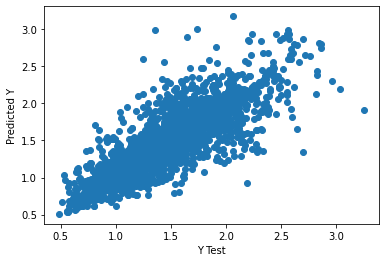

In [118]:
# plotting the graph for more simplification
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

 here we can see that we nearly have a straight line, in other words its better than the Linear regression model, and to be more sure lets check the RMSE

Random Forest Regressor

In [119]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [120]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


MAE: 0.10053197260273972
MSE: 0.021179135997260262
RMSE: 0.14553053286943005


RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

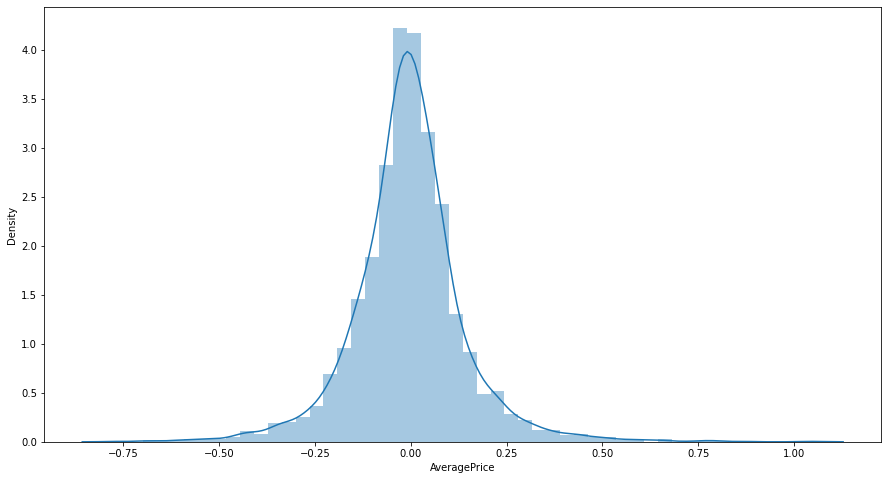

In [129]:
plt.figure(figsize=(15,8))
sns.distplot((y_test-pred),bins=50)

residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

Lets see final Actual Vs Predicted sample.

In [131]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
data.head()

,Y Test,Pred
8604,0.82,0.9623
2608,0.97,0.9898
14581,1.44,1.4045
4254,0.97,0.9074
16588,1.45,1.4576


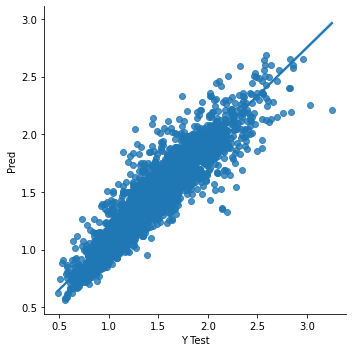

In [133]:
#plotting the graph for test and predicted values
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')

we  had done this prediction by taking Average price as an output variable which is continuity in nature by using the regression technique

Region Prediction

In [160]:
# importing the libraries for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import warnings
warnings.simplefilter("ignore")

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

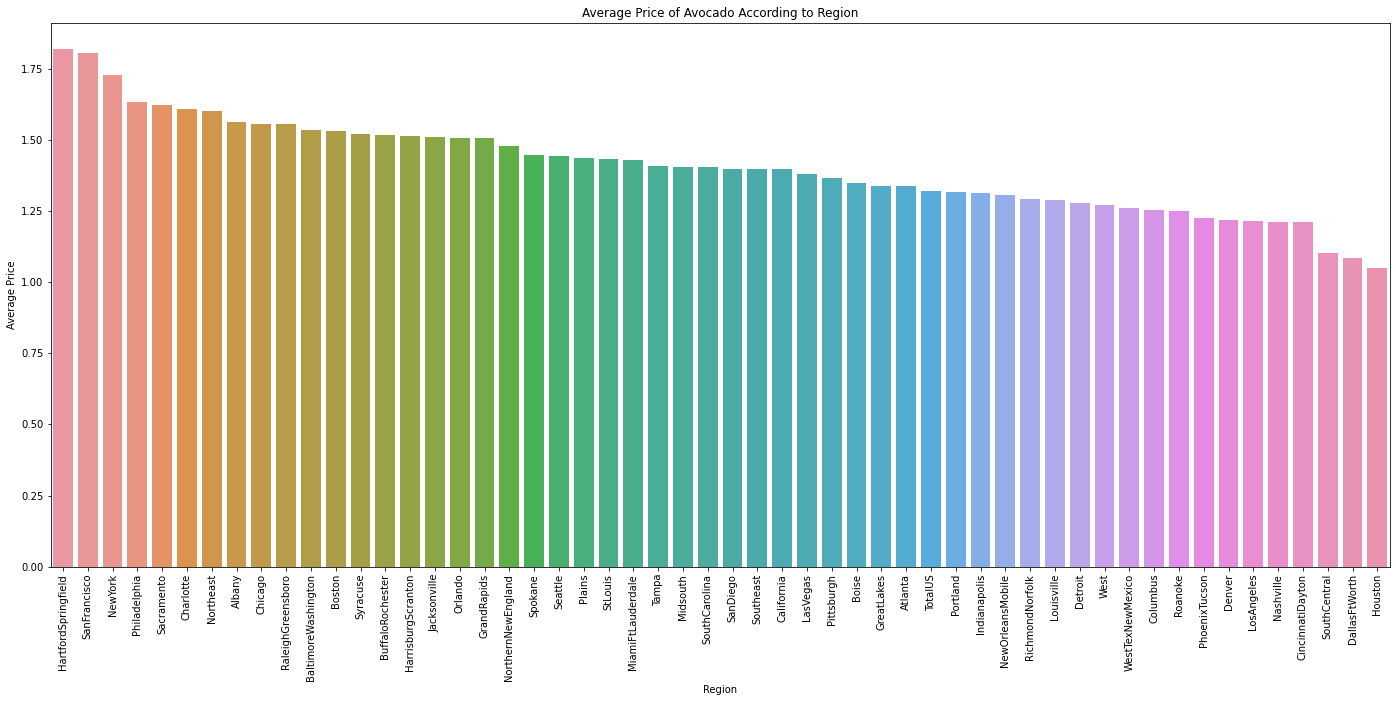

In [161]:
# average price based on region
region_list=list(new_df.region.unique())
average_price=[]

for i in region_list:
    x=new_df[new_df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Looks like these region are where price is very high

HartfordSpringfield

SanFrancisco

NewYork

Philadelphia

Sacramento

In [156]:
# assign the values fro training and testing phase
x=pd.get_dummies(new_df.drop(['region','Date'],axis=1),drop_first=True)
y=new_df[['region']]
print(x.shape)
print(y.shape)

(18249, 13)
(18249, 1)


In [157]:
# standardize the value of x
sc=StandardScaler()
sc.fit_transform(x)
x=pd.DataFrame(x,columns=x.columns)

now we are taking region as target variable and try to predict using classification

In [159]:
model=[DecisionTreeClassifier(),KNeighborsClassifier()]
max_acc_score=0
for r in range(1,20):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pred=i.predict(test_x)
        ac_score=accuracy_score(test_y,pred)
        print("accuracy corresponding to random state: ",r," is ",ac_score)
        if ac_score>max_acc_score:
            max_acc_score=ac_score
            f_state=r
            f_model=i
            
            
print("Max accuracy score corresponding to random state ",f_state," is ",max_acc_score," and model is: ",f_model)

accuracy corresponding to random state:  1  is  0.7884775029055288
accuracy corresponding to random state:  1  is  0.653993026730865
accuracy corresponding to random state:  2  is  0.7873152913830317
accuracy corresponding to random state:  2  is  0.6430350323758924
accuracy corresponding to random state:  3  is  0.7881454424705296
accuracy corresponding to random state:  3  is  0.6436991532458908
accuracy corresponding to random state:  4  is  0.7795118711605512
accuracy corresponding to random state:  4  is  0.6425369417233937
accuracy corresponding to random state:  5  is  0.7878133820355304
accuracy corresponding to random state:  5  is  0.650008301510875
accuracy corresponding to random state:  6  is  0.7818362942055455
accuracy corresponding to random state:  6  is  0.6485140295533787
accuracy corresponding to random state:  7  is  0.7801759920305495
accuracy corresponding to random state:  7  is  0.6377220654159057
accuracy corresponding to random state:  8  is  0.79412253030051

here we are going to use Decision Tree Classifier as we test it for first 20 rows

In [162]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [164]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [165]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7799086757990867


We got a classification rate of 77.99%, which is considered as good accuracy.

Thank you!!